## Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 3: Data

##### Excercise 1
1)	From 5 colleagues or classmates ask to provide a definition for the term data. 

    a)	Report these definitions and indicate the similarity among them. 
    b)	In your own words, define the all-encompassing definition of data put forth in this chapter.
    c)	Indicate the two important aspects of the definition in b.
    d)	Compare the 5 definitions of data from your colleagues with the all-encompassing definitions and indicate  


a) Colleague Definitions & Similarities
Colleague 1: "Numbers and facts collected for analysis"
Colleague 2: "Information stored in computers"
Colleague 3: "Measurements used to make decisions"
Colleague 4: "Observations about the world"
Colleague 5: "Raw material for creating knowledge"

Similarities:

All associate data with information collection

3/5 mention analysis or decision-making

None explicitly mention representation or structure

b) All-Encompassing Definition
Data: Structured or unstructured representations of objects, events, or their attributes, captured in a reproducible format to enable interpretation and analysis.

c) Two Key Aspects
Representation: Data encodes reality in symbolic forms (numbers, text, images)

Purpose: Collected to support reasoning, analysis, or decision-making

d) Comparison vs. Colleague Definitions
Colleague Definition | Matches All-Encompassing? | Missing Elements
"Numbers and facts"	| Partial |	Representation format, purpose
"Computer-stored info" | Partial | Real-world connection, structure
"Measurements" | Closest | Representation diversity
"Observations" | Partial | Storage/structured aspect
"Raw material" | Partial | Representation method

##### Excercise 2

For this exercise, we are going to use covid_impact_on_airport_traffic.csv. Answer the following questions. This dataset is from Kaggle.com, use this link to see its page: https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic.
The key attribute of this dataset is PercentOfBaseline which shows the ratio of air traffic in the specific day compared to pre-pandemic time (1st Feb to 15th March 2020)

In [12]:
import pandas as pd
covid_df = pd.read_excel("covid_impact_on_airport_traffic.xlsx")
covid_df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


    a)	What is the best definition of the data object for this dataset?
    b)	Are there any attributes in the data that only have one value? Use .unique() function to check. If there are remove them from the data and update the definition of the data object.
    c)	What type of values do the remaining attributes carry?
    d)	How much statistical information the attribute ‘PercentOfBaseline’ has?


Answer: 

a) time-series panel data object

In [13]:
# b)

single_value_cols = [
    col for col in covid_df.columns 
    if len(covid_df[col].unique()) == 1
    ]
print("Single-value columns:", single_value_cols)

Single-value columns: ['AggregationMethod', 'Version']


In [14]:
covid_df = covid_df.drop(columns=single_value_cols)

In [15]:
# c)
print(covid_df.dtypes)

# Key types:
# Date                       interval
# AirportName                 nominal
# PercentOfBaseline             ratio
# Centroid                    nominal
# City                        nominal
# State                       nominal
# ISO_3166_2                  nominal
# Country                     nominal
# Geography                   nominal

Date                 datetime64[ns]
AirportName                  object
PercentOfBaseline             int64
Centroid                     object
City                         object
State                        object
ISO_3166_2                   object
Country                      object
Geography                    object
dtype: object


In [16]:
# d)
print(covid_df['PercentOfBaseline'].describe())

count    7247.000000
mean       66.651442
std        22.134433
min         0.000000
25%        53.000000
50%        67.000000
75%        84.000000
max       100.000000
Name: PercentOfBaseline, dtype: float64


##### Excercise 3    

For this exercise, we are going to use US_Accidents.csv. Answer the following questions. This dataset is from Kaggle.com, use this link to see its page: https://www.kaggle.com/sobhanmoosavi/us-accidents.
This dataset shows all the car accidents in the US from February 2016 to Dec 2020. 



In [19]:
# import pandas as pd
# pd.read_csv('US_Accidents.csv')

    a)	What is the best definition of the data object for this dataset?
    b)	Are there any attributes in the data that only have one value? Use .unique() function to check. If there are remove them from the data and update the definition of the data object.
    c)	What type of values do the remaining attributes carry?
    d)	How much statistical information the numerical attributes of the dataset carry?
    e)	Compare the statistical information of the numerical attributes and see if any of them are a candidate for data redundancy.

Answer:

In [20]:
# skip because detaset too large

##### Excercise 4 

For this exercise, we are going to use fatal-police-shootings-data.csv. There are a lot of debates, discussions, dialogues, and protests happening in the US surrounding police killings. The Washington Post has been collecting data on all fatal police shootings in the US. The dataset available to the government and the public alike has date, age, gender, race, location, and other situational information of these fatal police shootings. You can read more about this data on https://www.washingtonpost.com/graphics/investigations/police-shootings-database/, and you can download the last version of the data from https://github.com/washingtonpost/data-police-shootings

In [21]:
import pandas as pd

fatal_df = pd.read_csv('fatal-police-shootings-data.csv')
fatal_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


    a)	What is the best definition of the data object for this dataset?
    b)	Are there any attributes in the data that only have one value? Use .unique() function to check. If there are remove them from the data and update the definition of the data object.
    c)	What type of values do the remaining attributes carry?
    d)	How much statistical information the numerical attributes of the dataset carry?
    e)	Compare the statistical information of the numerical attributes and see if any of them are a candidate for data redundancy.


a) This dataset is a structured event-log data object

In [22]:
# b)

single_value_cols = [
    col for col in fatal_df.columns 
    if fatal_df[col].nunique() == 1
    ]

single_value_cols

[]

In [23]:
# c) 

fatal_df.dtypes

# id                           nominal
# name                        nominal
# date                        interval
# manner_of_death             nominal
# armed                       nominal
# age                        ratio
# gender                      nominal
# race                        nominal
# city                        nominal
# state                       nominal
# signs_of_mental_illness       nominal
# threat_level                ordinal
# flee                        ordinal
# body_camera                   nominal
# longitude                  interval
# latitude                   interval
# is_geocoding_exact            nominal

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

In [24]:
# d)
fatal_df.describe()

,id,age,longitude,latitude
count,6068.000000,5802.000000,5771.000000,5771.000000
mean,3363.828444,37.160290,-97.238779,36.660617
std,1898.394615,13.039693,16.629397,5.377469
min,3.000000,6.000000,-158.137000,19.498000
25%,1716.750000,27.000000,-112.117000,33.475500
50%,3369.500000,35.000000,-94.386000,36.096000
75%,5019.250000,46.000000,-83.067000,39.986500
max,6629.000000,91.000000,-68.014000,71.301000


In [25]:
# e)

fatal_df[['age', 'latitude', 'longitude']].corr()

,age,latitude,longitude
age,1.000000,-0.014671,0.057657
latitude,-0.014671,1.000000,-0.116595
longitude,0.057657,-0.116595,1.000000


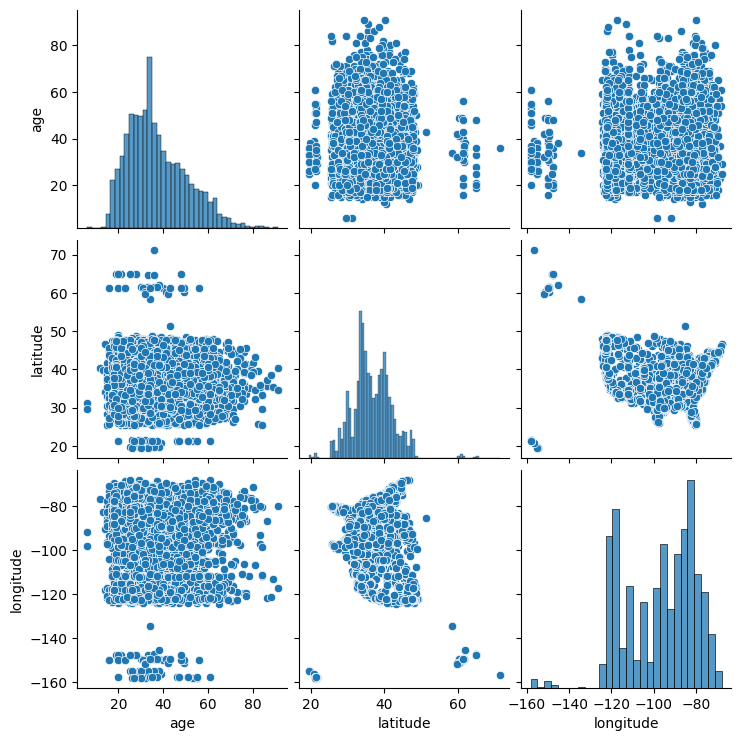

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(fatal_df[['age', 'latitude', 'longitude']])
plt.show()

##### Excercise 5
For this exercise, we will be using electricity_prediction.csv. The screenshot below shows the 5 rows of this dataset and a linear regression model created to predict electricity consumption based on the weekday and daily average temperature. 

In [27]:
import pandas as pd

electricity_df = pd.read_csv('electricity_prediction.csv')
electricity_df.head()

,Date,Weekday,Consumption,Average Temperature
0,1/1/2016,4,2581914,80
1,1/2/2016,5,2663011,77
2,1/3/2016,6,2725351,78
3,1/4/2016,0,3092978,80
4,1/5/2016,1,3231827,81


In [28]:
from sklearn.linear_model import LinearRegression

X = electricity_df[['Weekday', 'Average Temperature']]
y = electricity_df['Consumption']

lrm = LinearRegression()
lrm.fit(X, y)

print('intercept ', lrm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lrm.coef_}))

intercept  3074181.495015881
             Predictor   coefficient
0              Weekday -55710.145405
1  Average Temperature  -3476.377056


The regression model that is derived from the data is presented below.

    Consumption = 3074181.5- 55710.1 × Weekday-3476.4 ×Average Temperature

What is the fundamental mistake in this analysis? Describe it and provides possible solutions for it. 


Answer:

The primary issue is treating the Weekday variable (0-6) as a continuous/numeric predictor in the linear regression mode. Weekdays are categorical (nominal) variables, not continuous. The model assumes a linear relationship between Weekday and Consumption, implying that the difference between Monday (0) and Tuesday (1) is the same as between Saturday (5) and Sunday (6). This is illogical because weekdays have no inherent numerical meaning (e.g., Sunday isn’t "greater than" Monday).


Solution is to treat Weekday as Categorical (One-Hot Encoding)


##### Excercise 6
For this exercise, we will be using adult.csv. we used this dataset extensively in chapter 1. Read the dataset using Padans and call it adult_df.

In [29]:
import pandas as pd

adult_df = pd.read_csv('adult.csv')

    a)	What type of values does the attribute eduction carry?
    b)	Run 'adult_df.education.unique()', study the results, and explain what the code does.
    c)	Based on your understandings, order the output of the code you ran for b).
    d)	Run 'pd.get_dummies(adult_df.education)', study the results, and explain what the code does.
    e)	Run 'adult_df.sort_values(['education-num']).iloc[1:32561:1200]', study the results and explain what the code does.
    f)	Compare your answer to c) and what you learned from e). Was the order you came up with in c) correct?
    g)	Education is an ordinal attribute, translating an ordinal attribute from an analytic perspective to a programming perspective involves choosing between Boolean representation, string representation, and integer representation. Choose which choice has been made for the three following representations of the attribute education.
        - 'adult_df.education'
        - 'pd.get_dummies(adult_df.education)'
        - 'adult_df[‘education’]'
    h)	Either of the choices has some advantages and some disadvantages. Select which programing data representation each statement below describes. 
        - If an ordinal attribute is presented using this programming value representation, no bias or assumptions are added to the data, but algorithms that work with numbers cannot use the attribute. 
        - If an ordinal attribute is presented using this programming value representation, the data can be used by algorithms that only take numbers, but the size of the data becomes bigger and there may be concerns for computational costs.
        - If an ordinal attribute is presented using this programming value representation, there will be no size or computational concerns, but some statistical information that may not be true is assumed and it may create bias.


Answer:

a) Ordinal

In [30]:
# b)

adult_df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

Returns an array of unique values in the education column.

c)

1. Preschool

2. 1st-4th

3. 5th-6th

4. 7th-8th

5. 9th

6. 10th

7. 11th

8. 12th

9. HS-grad

10. Some-college

11. Assoc-acdm

12. Assoc-voc

13. Bachelors

14. Masters

15. Prof-school

16. Doctorate

In [31]:
# d)

pd.get_dummies(adult_df.education)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


Performs one-hot encoding, converting each education level to a binary column

In [32]:
# e)

adult_df.sort_values(['education-num']).iloc[1:32561:1200]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
32432,36,Private,208068,Preschool,1,Divorced,Other-service,Not-in-family,Other,Male,0,0,72,Mexico,<=50K
32467,55,Private,199713,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,48,United-States,<=50K
2449,25,Private,345121,10th,6,Separated,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
14720,17,Private,99462,11th,7,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K
4862,35,Private,46385,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,90,United-States,>50K
29380,25,Private,410240,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27398,50,State-gov,97778,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
25406,26,Private,122206,HS-grad,9,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,United-States,<=50K
23272,25,Private,109419,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
21374,44,Federal-gov,320071,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K


Sorts the DataFrame by education-num (numeric education ranking).

f) 

Hypothesis (c): Ordered education levels subjectively.

Reality (e): The correct order is defined by education-num

In [34]:
adult_df[['education', 'education-num']].drop_duplicates().sort_values('education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


g)

adult_df.education	String

pd.get_dummies(adult_df.education)	Boolean (One-hot)

adult_df['education']	String

h)

Advantages/Disadvantages of Representations

String Representation (adult_df.education):

* Statement: "No bias, but algorithms can’t use it."

* Pros: Preserves original labels.

* Cons: Cannot be used directly in math models.

One-Hot Encoding (get_dummies):

* Statement: "Algorithms can use it, but data size increases."

* Pros: Works with ML algorithms.

* Cons: Creates many columns; loses ordinality.

Integer Representation (education-num):

* Statement: "No size concerns, but assumes linear bias."

* Pros: Compact; respects order.

* Cons: Implies equal intervals between levels (e.g., "HS-grad → Bachelors" = "Bachelors → Masters").